In [29]:
import pandas as pd
import numpy as np

'''
from sklearn.cluster import KMeans
from sklearn.preprocessing import MultiLabelBinarizer
'''

#RECATEGORIZACIÓN: 1th method
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

#RECATEGORIZACIÓN: 2nd method
from sklearn.cluster import KMeans
from gensim.models import Word2Vec

#import matplotlib.pyplot as plt
#import matplotlib
#import seaborn as sns

import pathlib


# **I) Opcion 1: DATOS PROCESADOS**

## Partimos de datos procesados por DE

In [4]:
df_restaurants = pd.read_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/servicio_restaurantes.csv')
df_restaurants.head(2)

,id_servicios_restaurantes,servicios_restaurantes,direccion,id_condado,condado,codigo_postal_condado,latitud_condado,longitud_condado,id_ciudad,ciudad,codigo_postal_ciudad,latitud_ciudad,longitud_ciudad,estado,categorias,puntuacion_usuarios,analisis_sentimientos,url_del_negocio,enlaces_google_maps,anio
0,05HTY,ruby tuesday,"Kirkman Road, Orlando",lomP,Orange,"32801, 32839, 32789",28.484499,-81.251883,20si,apopka,32811,28.503323,-81.458029,Florida,NaN,NaN,NaN,NaN,NaN,2023
1,R252A,denny's,"Kirkman Road, Orlando",lomP,Orange,"32801, 32839, 32789",28.484499,-81.251883,20si,apopka,32811,28.502807,-81.458022,Florida,NaN,NaN,NaN,NaN,NaN,2023


In [5]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70391 entries, 0 to 70390
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_servicios_restaurantes  70391 non-null  object 
 1   servicios_restaurantes     70391 non-null  object 
 2   direccion                  70391 non-null  object 
 3   id_condado                 70391 non-null  object 
 4   condado                    70391 non-null  object 
 5   codigo_postal_condado      70391 non-null  object 
 6   latitud_condado            70391 non-null  float64
 7   longitud_condado           70391 non-null  float64
 8   id_ciudad                  70391 non-null  object 
 9   ciudad                     70391 non-null  object 
 10  codigo_postal_ciudad       70391 non-null  object 
 11  latitud_ciudad             70391 non-null  float64
 12  longitud_ciudad            70391 non-null  float64
 13  estado                     70391 non-null  obj

## Buscamos encontar relaciones entre variables que posteriormente podamos utilzar. De momento prescindimos de algunas, tales como:
- dirección: si bien las coordenadas son de utilidad (latitud y longitud)son de utilidad, en esta instancia la dirección es una etiqueta de ubicación menos valiosa para establecer una zona.
- condado
- código postal condado
- latitud condado
- longitud condado
- codigo postal ciudad
- estado: sabemos de antemano que vamos a analizar Florida unicamente, DE preparo los datos de antemano.
- url_del_negocio
-  enlaces_google_maps


# **II) Opcion 2: DATOS EN BRUTO**

## Partimos de datos en bruto: archivos independientes unidos aqui.

In [6]:
# Getting the path with "pathlib" library
folder = pathlib.Path("/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados-20250109T140622Z-001/Datos Procesados/restaurantes csv")

df_restaurants = pd.DataFrame() # Starting with a empty dataframe

for restaurant_file in folder.iterdir():

  df_to_concat = pd.read_csv(restaurant_file)
  df_restaurants = pd.concat([df_restaurants, df_to_concat])

df_restaurants.head(2)

,id_nombre,nombre,direccion,id_ciudad,ciudad,codigo_postal,latitud,longitud,puntuacion_yelp,categories,...,Brandon,Clearwater,Largo,San Petersburgo,pais,Dunedin,New Port Richey,Palm Harbor,Tarpon Springs,Pinellas Park
0,0002,London Heights British Pub,7701 N Nebraska Ave,RGTW,Tampa,33664,28.017764,-82.451033,3.5,"Bars, Pubs, Sports Bars, Nightlife, Restaurant...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0013,Chulas Mexican Grill,11061 Spring Hill Dr,I0WF,Spring Hill,34610,28.461770,-82.541448,3.5,"Mexican, Restaurants",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46391 entries, 0 to 17
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_nombre              46337 non-null  object 
 1   nombre                 45796 non-null  object 
 2   direccion              46077 non-null  object 
 3   id_ciudad              46337 non-null  object 
 4   ciudad                 46337 non-null  object 
 5   codigo_postal          46336 non-null  object 
 6   latitud                46337 non-null  float64
 7   longitud               46337 non-null  float64
 8   puntuacion_yelp        35497 non-null  float64
 9   categories             36636 non-null  object 
 10  puntuacion_usuarios    36636 non-null  float64
 11  anio                   46337 non-null  float64
 12  analisis_sentimientos  36636 non-null  float64
 13  estado                 10840 non-null  object 
 14  Unnamed: 0             54 non-null     float64
 15  Tampa     

## Buscamos encontar relaciones entre variables que posteriormente podamos utilzar.

###> Primero, procedemos a borrar aquellas columnas de "estado" en adelante:

In [8]:
df_restaurants = df_restaurants.iloc[:,:13]
df_restaurants.head(2)

,id_nombre,nombre,direccion,id_ciudad,ciudad,codigo_postal,latitud,longitud,puntuacion_yelp,categories,puntuacion_usuarios,anio,analisis_sentimientos
0,0002,London Heights British Pub,7701 N Nebraska Ave,RGTW,Tampa,33664,28.017764,-82.451033,3.5,"Bars, Pubs, Sports Bars, Nightlife, Restaurant...",3.3,2019.0,1.0
1,0013,Chulas Mexican Grill,11061 Spring Hill Dr,I0WF,Spring Hill,34610,28.461770,-82.541448,3.5,"Mexican, Restaurants",3.4,2019.0,1.0


###> Luego, para reducir el análisis (considerando que luego se pueden integrar si resultan ser relevantes):

- direccion
- codigo_postal
- puntuacion_yelp
- id_ciudad

In [9]:
df_restaurants = df_restaurants.drop(['direccion', 'codigo_postal', 'puntuacion_yelp', 'id_ciudad'], axis = 1)
df_restaurants.head(2)

,id_nombre,nombre,ciudad,latitud,longitud,categories,puntuacion_usuarios,anio,analisis_sentimientos
0,0002,London Heights British Pub,Tampa,28.017764,-82.451033,"Bars, Pubs, Sports Bars, Nightlife, Restaurant...",3.3,2019.0,1.0
1,0013,Chulas Mexican Grill,Spring Hill,28.461770,-82.541448,"Mexican, Restaurants",3.4,2019.0,1.0


## Borramos aquellos filas con valores que requerimos que NO sean nulos:

In [10]:
df_restaurants = df_restaurants.dropna(subset = ['latitud', 'longitud', 'categories','puntuacion_usuarios', 'anio'])
df_restaurants.head(2)

,id_nombre,nombre,ciudad,latitud,longitud,categories,puntuacion_usuarios,anio,analisis_sentimientos
0,0002,London Heights British Pub,Tampa,28.017764,-82.451033,"Bars, Pubs, Sports Bars, Nightlife, Restaurant...",3.3,2019.0,1.0
1,0013,Chulas Mexican Grill,Spring Hill,28.461770,-82.541448,"Mexican, Restaurants",3.4,2019.0,1.0


In [11]:
print(df_restaurants['categories'].unique())
print('En el estado actual la cantidad de categorias es:')
print(df_restaurants['categories'].unique().shape)

['Bars, Pubs, Sports Bars, Nightlife, Restaurants, British, Burgers, Breakfast & Brunch'
 'Mexican, Restaurants'
 'Food, Desserts, Restaurants, Ice Cream & Frozen Yogurt, Hot Dogs, Juice Bars & Smoothies'
 ...
 'Sandwiches, Restaurants, Ice Cream & Frozen Yogurt, Vegan, Food, Acai Bowls'
 'Salad, Italian, Food, Food Delivery Services, Restaurants, Pizza'
 'Restaurants, Italian, Wine Bars, Nightlife, Bars, Modern European']
En el estado actual la cantidad de categorias es:
(4999,)


## Se ve que existen unas 5000 categorias, para poder reducir esto, debemos encontrar la manera de realizar una:
# **I) RECATEGORIZACIÓN**

## Primero, vemos cuantas descripciones iniciales (categorias iniciales) hay en el dataset:

In [14]:
# Creamos un string que contenga todas las categorias: estén repetidas o no:
rows = df_restaurants.shape[0]
i = 0
categories = ''

while i < rows:

  categories = categories + ',' + df_restaurants['categories'].iloc[i]
  i += 1

#Convertir el string en una lista:
list_categories = categories.split(",")

#Convertir lista en set:
set_categories = set(list_categories) # Contiene elementos únicos
print('Hay un total de: ' + str(len(set_categories)) + ' categorias únicas')

Hay un total de: 951 categorias únicas


# I.1) RECATEGORIZACIÓN POR: **TF-IDF y KMeans**



In [19]:
# Ejemplo de categorías como descripciones de texto
categorias = list(set_categories)

# Convertir las categorías a una representación TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(categorias)

# Aplicar KMeans para reducir a 30 grupos
kmeans = KMeans(n_clusters=30, random_state=42)
kmeans.fit(X)

# Mostrar las categorías y sus grupos asignados
resultado_TF = pd.DataFrame({'Categoria': categorias, 'Categoria Principal': kmeans.labels_})

In [41]:
resultado_TF[resultado_TF['Categoria Principal'] == 26]

,Categoria,Categoria Principal
31,Mexican,26
333,Mexican restaurant,26
384,Mexican,26
769,Mexican restaurant,26
808,New Mexican Cuisine,26
853,New Mexican Cuisine,26


# I.2\) RECATEGORIZACIÓN POR: **Word2Vec y KMeans**

In [31]:
# Ejemplo de datos de categorías (estas serían las etiquetas o categorías)
categorias = list(set_categories)

# Entrenar un modelo Word2Vec para las categorías (en este caso, las categorías son palabras, pero podrían ser expresiones más complejas)
model = Word2Vec([categorias], vector_size=10, window=5, min_count=1, workers=4)

# Obtener las representaciones vectoriales de las categorías
vector_categorias = [model.wv[categoria] for categoria in categorias]

# Aplicar KMeans para reducir las categorías a 30 grupos
kmeans = KMeans(n_clusters=30, random_state=42)
kmeans.fit(vector_categorias)

# Mostrar los grupos de categorías
resultado_WV = pd.DataFrame({'Categoria': categorias, 'Categoria Principal': kmeans.labels_})

## En esta instacia, optaremos por el método N°1 primer(**TF-IDF y KMeans**). Lo convertimos en un diccionario:


In [59]:
# Dictionary with the main categoires
dict_main_cat = {}
main_cat = resultado_TF['Categoria Principal'].sort_values().unique() # Numbers from 0 to 29 (30 categories)

for m in main_cat:

  dict_main_cat[m] = set(resultado_TF[resultado_TF['Categoria Principal'] == m]['Categoria'])

## Ahora en el dataset original, se van a reemplazar las descripciones originales por las categorias principales encontradas:

In [77]:
rows = df_restaurants.shape[0]

for r in rows:

  numeric_rest_cat = []
  rest_cat = set(df_restaurants['categories'].iloc[r].split(','))

  for m in main_cat:

    value = bool(rest_cat.intersection( dict_main_cat[m]))

    if value:

      numeric_rest_cat.append(m)

  df_restaurants['categories'].iloc[r] = numeric_rest_cat


TypeError: 'int' object is not iterable

In [76]:
a ={1, 2, 3}
b = {1, 3}

bool(a.intersection(b))

True

___________________________________

## > Reteniendo las columnas que son de imporancia para el cálculo de los KPI's:

In [ ]:
df_restaurants = df_restaurants[['ciudad', 'servicios_restaurantes','categorias', 'puntuacion_usuarios','analisis_sentimientos','anio']]
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70391 entries, 0 to 70390
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ciudad                  70391 non-null  object 
 1   servicios_restaurantes  70391 non-null  object 
 2   categorias              61252 non-null  object 
 3   puntuacion_usuarios     61252 non-null  float64
 4   analisis_sentimientos   61252 non-null  object 
 5   anio                    70391 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 3.2+ MB


### > Exploramos los datos para ver la cantidad de información que tenemos por ciudad, en particular las ciudades con la menor y mayor cantidad de de datos para el análisis:

In [ ]:
df_restaurants['ciudad'].value_counts()[0:10,]

,count
ciudad,
Tampa,15817
Clearwater,3342
St. Petersburg,2907
Saint Petersburg,2831
Miami,1620
Largo,1578
Brandon,1463
Dunedin,1188
hialeah,1101


In [ ]:
df_restaurants['ciudad'].value_counts(ascending = True)[0:10,]

,count
ciudad,
LARGO,1
jasper,1
moore haven,1
Carrollwood,1
Pinellas park,1
Wesley chapel,2
Shalimar,2
Waldo,2
wimauma,2


## Dado que hay muchas ciudad con pocos restaurantes registrados, se quitarán estas ciudades para el análisis. Como criterio, se buscará conservar las ciudades que abarquen el 80% de los datos:

In [ ]:
cities_count = df_restaurants['ciudad'].value_counts() # List of cities, from more to less restaurants (data)
cities = cities_count.index
total = df_restaurants.shape[0] # la cantidad de datos disponibles del dataset, filas

i = 0
n = 0

while (n/total) <= 0.8: #Checando si se contiene ya al 80% de los datos

  n += cities_count.loc[cities[i]]
  i += 1


city_list = cities_count.iloc[:i]
df_restaurants = df_restaurants[df_restaurants['ciudad'].isin(city_list.index)]

## Eliminamos las filas que no cuentan con información de año ni puntuación de usuario y se crea un nuevo atributo: "Buena puntuación"

In [ ]:
df_restaurants = df_restaurants.dropna(subset=['puntuacion_usuarios', 'anio']) # Eliminando valores nulos para los atributos de puntuación y año
kpi['anio'] = df_restaurants['anio'].astype(str)

# Nuevo atributo: True si >= 4, caso contrario
kpi = kpi.assign(good_punctuation = lambda x: (x['puntuacion_usuarios'].astype(int) >= 4))

,ciudad,servicios_restaurantes,categorias,puntuacion_usuarios,analisis_sentimientos,anio,good_punctuation
9141,St. Petersburg,ted's barber shop,['Barber shop'],4.4,negativo,2024,True
9142,St. Petersburg,ted's barber shop,['Barber shop'],4.4,positivo,2024,True


# **I) KPI1**: % de buenas reviews

In [ ]:
kpi1_dict = {} # Empty dictionary
cities = kpi['ciudad'].unique() # Lista con las ciudades seleccionadas
anios = kpi['anio'].sort_values().unique() # Lista con los años de los cuales disponemos de datos

for city in cities:

  kpi1 = kpi[(kpi['ciudad'] == city)]
  kpi1_lista = []
  for anio in anios:

    num = np.shape(kpi1[(kpi1['anio'] == anio) & kpi1['good_punctuation'] == True])[0]
    den = np.shape(kpi1[kpi1['anio'] == anio])[0]

    if den != 0:
      ratio = round((num/den)*100, 1)

    else:
      ratio = np.nan

    kpi1_lista.append(ratio)

  kpi1_dict[city] = kpi1_lista


kpi1_df = pd.DataFrame(kpi1_dict, index = anios)

In [ ]:
kpi1_df

,St. Petersburg,Hialeah,Fort Lauderdale,Miami,Orlando,Tampa,Jacksonville,Riverview,West Palm Beach,Lakeland,...,Treasure Island,Seminole,Gulfport,Valrico,Indian Rocks Beach,Land O' Lakes,Madeira Beach,Safety Harbor,Saint Petersburg,St. Pete Beach
2010,41.2,NaN,NaN,NaN,NaN,46.7,NaN,54.5,NaN,NaN,...,38.5,42.1,60.0,36.4,46.7,44.4,42.1,30.0,46.2,39.3
2011,43.1,NaN,NaN,NaN,NaN,47.3,NaN,60.0,NaN,NaN,...,55.6,44.4,66.7,38.5,45.8,30.0,41.7,38.5,45.0,41.9
2012,44.9,NaN,NaN,NaN,NaN,49.6,NaN,63.9,NaN,NaN,...,52.6,39.4,68.8,44.4,50.0,26.7,44.4,59.1,48.0,48.0
2013,51.6,NaN,NaN,NaN,NaN,50.8,NaN,60.5,NaN,NaN,...,47.8,48.5,61.9,35.3,51.9,27.8,43.3,59.3,47.4,45.8
2014,56.2,NaN,NaN,NaN,NaN,54.0,NaN,60.8,NaN,NaN,...,54.5,56.4,69.6,47.1,56.7,40.0,46.9,56.7,51.1,49.2
2015,55.1,NaN,NaN,NaN,NaN,56.6,NaN,63.6,NaN,NaN,...,52.2,54.3,72.0,47.6,62.1,47.8,51.4,59.3,60.3,50.8
2016,59.0,NaN,NaN,NaN,NaN,58.9,NaN,60.4,NaN,NaN,...,60.7,62.2,70.4,50.0,62.1,50.0,48.6,68.8,63.5,49.1
2017,61.7,NaN,NaN,NaN,NaN,60.8,NaN,63.9,NaN,NaN,...,60.0,63.0,70.8,56.0,63.0,56.0,58.5,68.8,67.6,50.0
2018,62.4,NaN,NaN,NaN,NaN,63.5,NaN,71.0,NaN,NaN,...,66.7,64.0,78.3,60.0,67.9,56.5,63.4,70.6,71.2,50.0
2019,67.3,NaN,NaN,NaN,NaN,65.8,NaN,67.9,NaN,NaN,...,60.7,61.4,78.3,56.0,69.0,63.3,59.5,77.1,73.4,50.0


## Dado que hay muchas ciudades con nan values, eliminaremos estas de nuestro análisis



In [ ]:
kpi1_df = kpi1_df.dropna(axis=1)
kpi1_df

,St. Petersburg,Tampa,Riverview,Port Richey,Largo,Brandon,Clearwater,Pinellas Park,Spring Hill,St Pete Beach,...,Ruskin,New Port Richey,Treasure Island,Seminole,Gulfport,Valrico,Indian Rocks Beach,Land O' Lakes,Madeira Beach,Safety Harbor
2010,41.2,46.7,54.5,25.0,45.2,44.9,50.0,44.8,44.4,45.5,...,40.0,42.1,38.5,42.1,60.0,36.4,46.7,44.4,42.1,30.0
2011,43.1,47.3,60.0,26.3,45.2,50.0,46.8,46.5,43.3,50.0,...,44.4,43.5,55.6,44.4,66.7,38.5,45.8,30.0,41.7,38.5
2012,44.9,49.6,63.9,29.0,52.7,44.7,46.7,49.1,41.9,53.3,...,53.8,40.6,52.6,39.4,68.8,44.4,50.0,26.7,44.4,59.1
2013,51.6,50.8,60.5,40.0,52.8,48.0,49.6,53.2,42.9,52.4,...,50.0,47.4,47.8,48.5,61.9,35.3,51.9,27.8,43.3,59.3
2014,56.2,54.0,60.8,36.6,50.8,48.7,54.2,54.4,47.2,53.3,...,50.0,46.4,54.5,56.4,69.6,47.1,56.7,40.0,46.9,56.7
2015,55.1,56.6,63.6,44.2,49.3,51.8,59.9,58.6,49.1,54.8,...,54.2,51.5,52.2,54.3,72.0,47.6,62.1,47.8,51.4,59.3
2016,59.0,58.9,60.4,45.2,54.9,52.9,60.6,64.6,55.4,54.5,...,56.2,55.0,60.7,62.2,70.4,50.0,62.1,50.0,48.6,68.8
2017,61.7,60.8,63.9,47.6,56.7,62.0,64.0,62.9,46.4,55.9,...,59.3,55.4,60.0,63.0,70.8,56.0,63.0,56.0,58.5,68.8
2018,62.4,63.5,71.0,48.8,59.0,61.8,66.2,66.2,50.8,60.0,...,53.8,58.6,66.7,64.0,78.3,60.0,67.9,56.5,63.4,70.6
2019,67.3,65.8,67.9,50.0,62.5,64.3,69.7,68.7,58.9,65.6,...,60.0,55.3,60.7,61.4,78.3,56.0,69.0,63.3,59.5,77.1


## Graficando los resultados:

<Axes: >

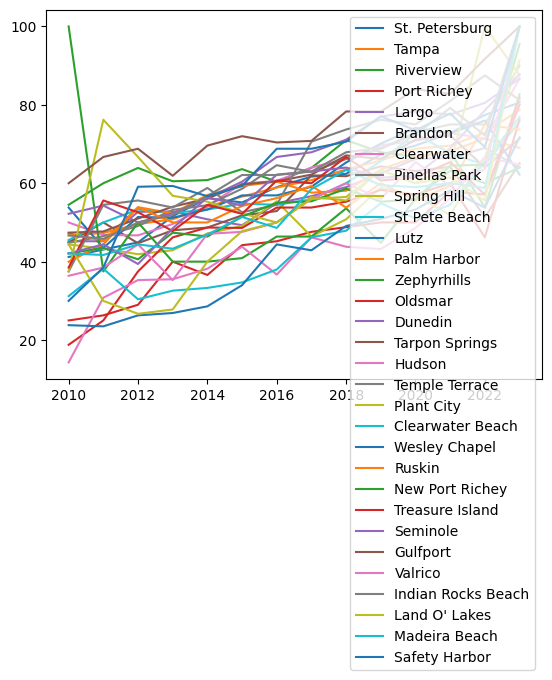

In [ ]:
kpi1_df.plot()

## En bruto, puede verse que existe una tendencia en el crecimiento de "buenas reviews". Dado que debemos crear un KPI, ¿cuál es el valor al que debe apuntar como negocio para estar dentro del promedio del mercado?

## Para esto, se tomarán los valores correspondientes al 2022 y de ahi obtener un promedio, una métrica a la qué apuntar.

In [ ]:
kpi1_df.loc['2022'].describe()

,2022
count,31.000000
mean,68.303226
std,11.990927
min,46.200000
25%,59.400000
50%,66.700000
75%,75.000000
max,100.000000


## De los resultados (mean), tomaremos como métrica a alcanzar, un valor de:

# **KPI1 = 68%**


In [ ]:
kpi1_df.to_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/kpi1.csv')

# **II) KPI2**: puntuación clientes

In [ ]:
kpi2_dict = {} # Empty dictionary
cities = kpi['ciudad'].unique() # Lista con las ciudades seleccionadas
anios = kpi['anio'].sort_values().unique() # Lista con los años de los cuales disponemos de datos

for city in cities:

  kpi2 = kpi[(kpi['ciudad'] == city)]
  kpi2_lista = []
  for anio in anios:

    average_stars = kpi2['puntuacion_usuarios'][kpi2['anio'] == anio].mean()
    kpi2_lista.append(average_stars)

  kpi2_dict[city] = kpi2_lista

kpi2_df = pd.DataFrame(kpi2_dict, index = anios)

In [ ]:
kpi2_df

,St. Petersburg,Hialeah,Fort Lauderdale,Miami,Orlando,Tampa,Jacksonville,Riverview,West Palm Beach,Lakeland,...,Treasure Island,Seminole,Gulfport,Valrico,Indian Rocks Beach,Land O' Lakes,Madeira Beach,Safety Harbor,Saint Petersburg,St. Pete Beach
2010,3.525773,NaN,NaN,NaN,NaN,3.622837,NaN,3.545455,NaN,NaN,...,3.692308,3.631579,3.750000,3.500000,3.700000,3.666667,3.578947,3.450000,3.568182,3.535714
2011,3.525547,NaN,NaN,NaN,NaN,3.632262,NaN,3.740000,NaN,NaN,...,3.861111,3.703704,3.833333,3.500000,3.666667,3.450000,3.562500,3.538462,3.559172,3.593023
2012,3.532934,NaN,NaN,NaN,NaN,3.662791,NaN,3.819444,NaN,NaN,...,3.789474,3.590909,3.875000,3.722222,3.711538,3.333333,3.611111,3.818182,3.586592,3.690000
2013,3.638009,NaN,NaN,NaN,NaN,3.670948,NaN,3.732558,NaN,NaN,...,3.760870,3.696970,3.761905,3.529412,3.759259,3.361111,3.633333,3.796296,3.612245,3.669492
2014,3.743802,NaN,NaN,NaN,NaN,3.704140,NaN,3.745098,NaN,NaN,...,3.863636,3.782051,3.869565,3.588235,3.783333,3.575000,3.671875,3.800000,3.684783,3.738095
2015,3.757143,NaN,NaN,NaN,NaN,3.741392,NaN,3.836364,NaN,NaN,...,3.847826,3.757143,3.920000,3.619048,3.862069,3.760870,3.757143,3.796296,3.792887,3.754098
2016,3.797071,NaN,NaN,NaN,NaN,3.779542,NaN,3.764151,NaN,NaN,...,3.928571,3.851351,3.962963,3.659091,3.862069,3.750000,3.742857,3.953125,3.851923,3.763158
2017,3.862150,NaN,NaN,NaN,NaN,3.812546,NaN,3.860656,NaN,NaN,...,3.900000,3.891304,3.937500,3.820000,3.833333,3.820000,3.829268,3.953125,3.926056,3.767857
2018,3.873171,NaN,NaN,NaN,NaN,3.861861,NaN,3.959677,NaN,NaN,...,3.944444,3.950000,4.021739,3.880000,3.892857,3.826087,3.902439,3.985294,3.955298,3.768519
2019,3.945455,NaN,NaN,NaN,NaN,3.902778,NaN,3.929487,NaN,NaN,...,3.892857,3.877193,4.021739,3.840000,3.879310,3.883333,3.864865,4.071429,4.006993,3.760000


## Eliminaremos los valores nan del dataframe de nuestro análisis:


In [ ]:
kpi2_df = kpi2_df.dropna(axis=1)
kpi2_df = round(kpi2_df, 2)
kpi2_df

,St. Petersburg,Tampa,Riverview,Port Richey,Largo,Brandon,Clearwater,Pinellas Park,Spring Hill,St Pete Beach,...,Ruskin,New Port Richey,Treasure Island,Seminole,Gulfport,Valrico,Indian Rocks Beach,Land O' Lakes,Madeira Beach,Safety Harbor
2010,3.53,3.62,3.55,3.31,3.56,3.57,3.62,3.53,3.56,3.45,...,3.70,3.37,3.69,3.63,3.75,3.50,3.70,3.67,3.58,3.45
2011,3.53,3.63,3.74,3.26,3.56,3.61,3.66,3.58,3.62,3.59,...,3.72,3.49,3.86,3.70,3.83,3.50,3.67,3.45,3.56,3.54
2012,3.53,3.66,3.82,3.34,3.71,3.58,3.69,3.62,3.63,3.63,...,3.81,3.48,3.79,3.59,3.88,3.72,3.71,3.33,3.61,3.82
2013,3.64,3.67,3.73,3.53,3.70,3.64,3.71,3.70,3.57,3.64,...,3.69,3.61,3.76,3.70,3.76,3.53,3.76,3.36,3.63,3.80
2014,3.74,3.70,3.75,3.51,3.68,3.64,3.78,3.71,3.63,3.72,...,3.68,3.61,3.86,3.78,3.87,3.59,3.78,3.58,3.67,3.80
2015,3.76,3.74,3.84,3.57,3.68,3.73,3.85,3.81,3.68,3.77,...,3.75,3.69,3.85,3.76,3.92,3.62,3.86,3.76,3.76,3.80
2016,3.80,3.78,3.76,3.61,3.77,3.75,3.86,3.88,3.75,3.77,...,3.77,3.72,3.93,3.85,3.96,3.66,3.86,3.75,3.74,3.95
2017,3.86,3.81,3.86,3.64,3.79,3.88,3.92,3.87,3.72,3.78,...,3.80,3.73,3.90,3.89,3.94,3.82,3.83,3.82,3.83,3.95
2018,3.87,3.86,3.96,3.67,3.82,3.86,3.96,3.88,3.75,3.83,...,3.67,3.79,3.94,3.95,4.02,3.88,3.89,3.83,3.90,3.99
2019,3.95,3.90,3.93,3.70,3.87,3.95,3.99,3.90,3.83,3.95,...,3.78,3.76,3.89,3.88,4.02,3.84,3.88,3.88,3.86,4.07


## Graficando lo resultados:

<Axes: >

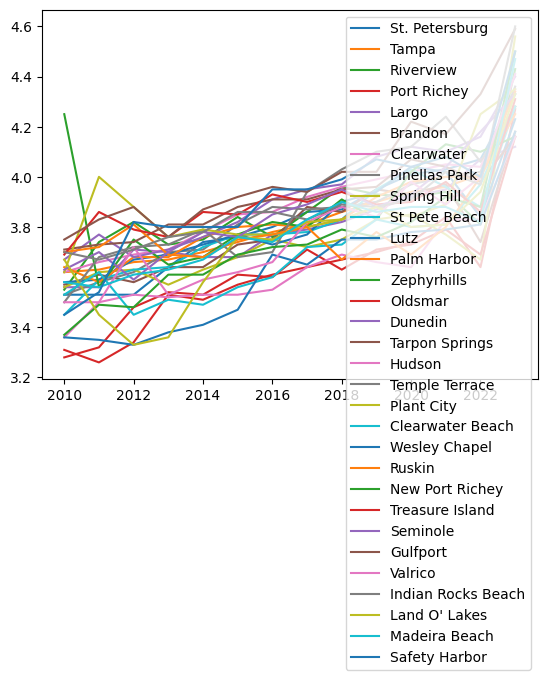

In [ ]:
kpi2_df.plot()

## Obtenemos una métrica objetivo:

In [ ]:
kpi2_df.loc['2022'].describe()

,2022
count,31.000000
mean,3.955484
std,0.164212
min,3.640000
25%,3.835000
50%,3.980000
75%,4.050000
max,4.330000


## De los resultados (mean), tomaremos como métrica a alcanzar, un valor de:

# **KPI2 = 4.0**

In [ ]:
kpi2_df.to_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/kpi2.csv')

# **Consulta del PO:**

# IV) ¿Cuáles son las ciudades con mejores puntuaciones, pero pocos restaurantes?

In [ ]:
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46373 entries, 0 to 3108
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_nombre              46337 non-null  object 
 1   nombre                 45796 non-null  object 
 2   direccion              46077 non-null  object 
 3   id_ciudad              46337 non-null  object 
 4   ciudad                 46337 non-null  object 
 5   codigo_postal          46336 non-null  object 
 6   latitud                46337 non-null  float64
 7   longitud               46337 non-null  float64
 8   puntuacion_yelp        35497 non-null  float64
 9   categories             36636 non-null  object 
 10  puntuacion_usuarios    36636 non-null  float64
 11  anio                   46337 non-null  float64
 12  analisis_sentimientos  36636 non-null  float64
 13  estado                 10840 non-null  object 
 14  Unnamed: 0             36 non-null     float64
 15  Tampa   

In [ ]:
df_po = df_restaurants[['ciudad', 'puntuacion_usuarios', 'anio']]
df_po = df_po[df_po['puntuacion_usuarios'] >= 4].sort_values(by = 'anio') #Esto encaja con lo que definimos como "buenas reviews"
df_po

,ciudad,puntuacion_usuarios,anio
29756,Tampa,4.0,2010
28796,Treasure Island,4.0,2010
28794,Tampa,4.0,2010
28793,Seminole,4.0,2010
28789,Tampa,4.0,2010
...,...,...,...
22006,Jacksonville,4.5,2024
22007,Jacksonville,4.5,2024
22008,Jacksonville,4.5,2024
21984,Tampa,4.0,2024


In [ ]:
restaurants_bycity_byyear = {} # Empty dictionary
cities = df_po['ciudad'].value_counts().index # Lista con las ciudades seleccionadas
anios = df_po['anio'].sort_values().unique() # Lista con los años de los cuales disponemos de datos

for city in cities:

  po_df_bycity= df_po[df_po['ciudad'] == city]
  values_bycity_byyear = []

  for anio in anios:

    po_bycity_byyear = po_df_bycity[po_df_bycity['anio'] == anio]
    number_restaurants = np.shape(po_bycity_byyear)[0]
    values_bycity_byyear.append(number_restaurants)

  restaurants_bycity_byyear[city] = values_bycity_byyear

result = pd.DataFrame(restaurants_bycity_byyear, index = anios)
result = result[result.index < 2024]
result

,Tampa,Clearwater,St. Petersburg,Saint Petersburg,Miami,Largo,Brandon,Dunedin,Orlando,Palm Harbor,...,Tallahassee,Gainesville,Temple Terrace,Lakeland,Port St. Lucie,Hudson,Ruskin,Valrico,Land O' Lakes,Zephyrhills
2010,270,51,40,61,0,19,22,12,0,17,...,0,0,3,0,0,1,2,4,4,2
2011,383,74,59,76,0,28,41,25,0,29,...,0,0,6,0,0,8,4,5,3,3
2012,491,98,75,86,0,48,38,35,0,41,...,0,0,5,0,0,12,7,8,4,7
2013,574,115,114,93,0,56,48,44,0,46,...,0,0,7,0,0,11,9,6,5,8
2014,665,143,136,94,0,64,55,50,0,49,...,0,0,10,0,0,13,11,8,8,8
2015,756,170,135,144,0,67,59,58,0,54,...,0,0,10,0,0,14,13,10,11,9
2016,797,175,141,165,0,78,64,70,0,58,...,0,0,12,0,0,11,18,11,11,13
2017,833,192,132,192,0,85,75,74,0,57,...,0,0,12,0,0,18,16,14,14,13
2018,894,194,128,215,0,92,76,81,0,54,...,0,0,14,0,0,14,14,15,13,15
2019,947,214,148,210,0,95,81,97,0,61,...,0,0,16,0,0,16,18,14,19,13


## Eliminamos las columnas con valores nulos (no se dispone de información):

In [ ]:
result = result.replace(0, np.nan).dropna(axis=1, how="all")
result

,Tampa,Clearwater,St. Petersburg,Saint Petersburg,Largo,Brandon,Dunedin,Palm Harbor,New Port Richey,Pinellas Park,...,St Pete Beach,Indian Rocks Beach,Gulfport,Treasure Island,Temple Terrace,Hudson,Ruskin,Valrico,Land O' Lakes,Zephyrhills
2010,270,51,40,61,19,22,12,17,8,13,...,5,7,6,5,3,1,2,4,4,2
2011,383,74,59,76,28,41,25,29,20,20,...,8,11,6,10,6,8,4,5,3,3
2012,491,98,75,86,48,38,35,41,26,27,...,8,13,11,10,5,12,7,8,4,7
2013,574,115,114,93,56,48,44,46,36,33,...,11,14,13,11,7,11,9,6,5,8
2014,665,143,136,94,64,55,50,49,39,37,...,16,17,16,12,10,13,11,8,8,8
2015,756,170,135,144,67,59,58,54,50,41,...,17,18,18,12,10,14,13,10,11,9
2016,797,175,141,165,78,64,70,58,55,42,...,18,18,19,17,12,11,18,11,11,13
2017,833,192,132,192,85,75,74,57,56,44,...,19,17,17,15,12,18,16,14,14,13
2018,894,194,128,215,92,76,81,54,65,45,...,18,19,18,18,14,14,14,15,13,15
2019,947,214,148,210,95,81,97,61,57,46,...,21,20,18,17,16,16,18,14,19,13


In [ ]:
result.to_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/po1.csv')

<Axes: >

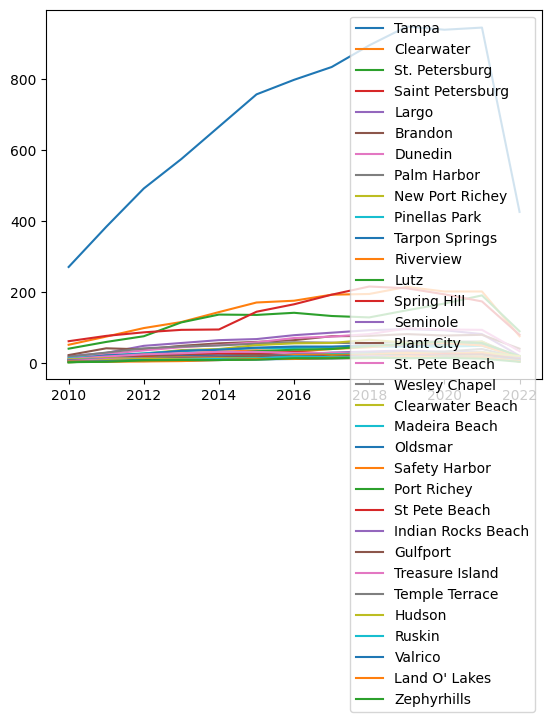

In [ ]:
result.plot()

# Esto muestra en valor absoluto cuales son las ciudades que poseen más restaurantes. Sin embargo para hacer una comparación justa, debemos comparar el incremmento relativo en las ciudades. Siendo asi, no solo obtenemos las ciudades que tienen puntuaciones mayores a 4, sino también aquellas donde se dió el mayor crecimiento de restaurantes:

In [ ]:
po2_dict = {} # Empty dictionary
cities = result.columns # Lista de ciudades
anios = result.index[1:] # Lista con los años, a partir del 2011

for city in cities:

  ai = np.array(result[city].iloc[:12])
  aiplus = np.array(result[city].iloc[1:])

  ratio_bycity =  ((aiplus - ai) / ai) * 100
  po2_dict[city] = ratio_bycity

po2_df = pd.DataFrame(po2_dict, index = anios)
po2_df = round(po2_df, 1)

In [ ]:
po2_df

,Tampa,Clearwater,St. Petersburg,Saint Petersburg,Largo,Brandon,Dunedin,Palm Harbor,New Port Richey,Pinellas Park,...,St Pete Beach,Indian Rocks Beach,Gulfport,Treasure Island,Temple Terrace,Hudson,Ruskin,Valrico,Land O' Lakes,Zephyrhills
2011,41.9,45.1,47.5,24.6,47.4,86.4,108.3,70.6,150.0,53.8,...,60.0,57.1,0.0,100.0,100.0,700.0,100.0,25.0,-25.0,50.0
2012,28.2,32.4,27.1,13.2,71.4,-7.3,40.0,41.4,30.0,35.0,...,0.0,18.2,83.3,0.0,-16.7,50.0,75.0,60.0,33.3,133.3
2013,16.9,17.3,52.0,8.1,16.7,26.3,25.7,12.2,38.5,22.2,...,37.5,7.7,18.2,10.0,40.0,-8.3,28.6,-25.0,25.0,14.3
2014,15.9,24.3,19.3,1.1,14.3,14.6,13.6,6.5,8.3,12.1,...,45.5,21.4,23.1,9.1,42.9,18.2,22.2,33.3,60.0,0.0
2015,13.7,18.9,-0.7,53.2,4.7,7.3,16.0,10.2,28.2,10.8,...,6.2,5.9,12.5,0.0,0.0,7.7,18.2,25.0,37.5,12.5
2016,5.4,2.9,4.4,14.6,16.4,8.5,20.7,7.4,10.0,2.4,...,5.9,0.0,5.6,41.7,20.0,-21.4,38.5,10.0,0.0,44.4
2017,4.5,9.7,-6.4,16.4,9.0,17.2,5.7,-1.7,1.8,4.8,...,5.6,-5.6,-10.5,-11.8,0.0,63.6,-11.1,27.3,27.3,0.0
2018,7.3,1.0,-3.0,12.0,8.2,1.3,9.5,-5.3,16.1,2.3,...,-5.3,11.8,5.9,20.0,16.7,-22.2,-12.5,7.1,-7.1,15.4
2019,5.9,10.3,15.6,-2.3,3.3,6.6,19.8,13.0,-12.3,2.2,...,16.7,5.3,0.0,-5.6,14.3,14.3,28.6,-6.7,46.2,-13.3
2020,-1.0,-6.1,12.8,-8.1,-3.2,-4.9,-3.1,-1.6,-15.8,0.0,...,14.3,5.0,16.7,-5.9,-6.2,12.5,-16.7,21.4,-21.1,7.7


<Axes: >

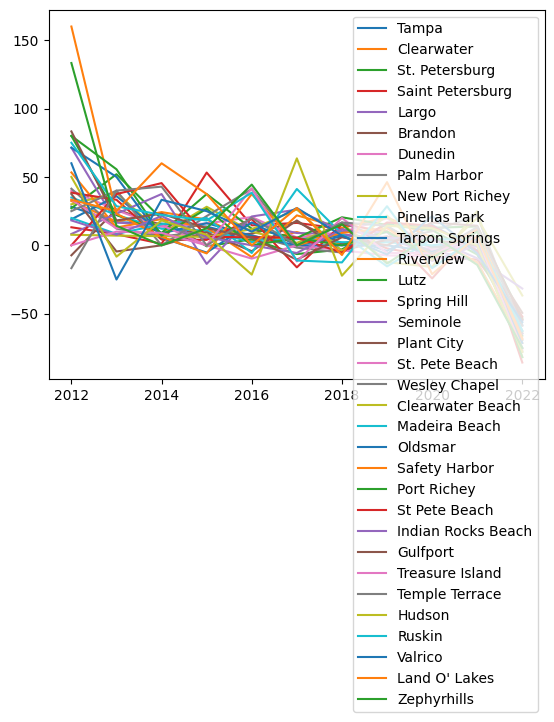

In [ ]:
po2_df[1:].plot()

In [ ]:
po2_df.to_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/po2.csv')


# **PARA REVISAR**

In [ ]:
df_restaurants[df_restaurants['categorias'] == '[\'Barber shop\']']

In [ ]:
df_restaurants.head(2)

,id_servicios_restaurantes,servicios_restaurantes,id_ciudad,ciudad,codigo_postal_ciudad,latitud_ciudad,longitud_ciudad,categorias,puntuacion_usuarios,analisis_sentimientos,anio
0,05HTY,ruby tuesday,20si,apopka,32811,28.503323,-81.458029,NaN,NaN,NaN,2023
1,R252A,denny's,20si,apopka,32811,28.502807,-81.458022,NaN,NaN,NaN,2023


In [ ]:
df_restaurants = df_restaurants.drop(['direccion', 'id_condado', 'condado', 'codigo_postal_condado', 'latitud_condado', 'longitud_condado', 'estado', 'url_del_negocio', 'enlaces_google_maps'], axis = 1)
df_restaurants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70391 entries, 0 to 70390
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id_servicios_restaurantes  70391 non-null  object 
 1   servicios_restaurantes     70391 non-null  object 
 2   id_ciudad                  70391 non-null  object 
 3   ciudad                     70391 non-null  object 
 4   codigo_postal_ciudad       70391 non-null  object 
 5   latitud_ciudad             70391 non-null  float64
 6   longitud_ciudad            70391 non-null  float64
 7   categorias                 61252 non-null  object 
 8   puntuacion_usuarios        61252 non-null  float64
 9   analisis_sentimientos      61252 non-null  object 
 10  anio                       70391 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 5.9+ MB


In [ ]:
df_restaurants = df_restaurants[(df_restaurants.categorias == np.nan) | (df_restaurants.puntuacion_usuarios == np.nan)]
df_restaurants.head(5)

,id_servicios_restaurantes,servicios_restaurantes,id_ciudad,ciudad,codigo_postal_ciudad,latitud_ciudad,longitud_ciudad,categorias,puntuacion_usuarios,analisis_sentimientos,anio


In [ ]:
prueba = df_restaurants.copy()

In [ ]:
prueba = prueba[(prueba['categorias'] == np.nan) or (prueba['puntuacion_usuarios'] == np.nan)]
prueba.head(5)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
np.none

AttributeError: module 'numpy' has no attribute 'none'

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/datos_ML.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13866 entries, 0 to 13865
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id_nombre            13866 non-null  int64  
 1   nombre               13866 non-null  object 
 2   id_ciudad            13866 non-null  object 
 3   ciudad               13866 non-null  object 
 4   latitud              13866 non-null  float64
 5   longitud             13866 non-null  float64
 6   categorias           13866 non-null  object 
 7   puntuacion_usuarios  13866 non-null  float64
 8   anio                 13866 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 975.1+ KB


In [ ]:
df_restaurants

In [ ]:
test.head(5)

,id_nombre,nombre,id_ciudad,ciudad,latitud,longitud,categorias,puntuacion_usuarios,anio
0,9139,fade barber shop,Q2Pa,Miami Lakes,25.912519,-80.330857,Supermercados y Tiendas,4.5,2024
1,9141,ted's barber shop,p9Ny,St. Petersburg,27.751763,-82.674279,Supermercados y Tiendas,4.4,2024
2,9144,gormley's on the river | modern cuisine in his...,UQ21,Apalachicola,29.726949,-84.981535,Cocina Especializada,4.3,2024
3,9146,bachata rosa,QCAZ,Hialeah,25.848173,-80.299773,Restaurantes y servicios,3.6,2024
4,9148,zampini's bottega,TDGL,Fort Lauderdale,26.116549,-80.138561,Restaurantes y servicios,4.7,2024


In [ ]:
test['nombre'].value_counts()#.shape

,count
nombre,
subway,98
sally beauty,56
mcdonald's,48
wendy's,32
starbucks,31
...,...
barber shop kinam,1
lotus thai restaurant,1
6th street north,1


In [ ]:
test[test['nombre'] == 'subway']

,id_nombre,nombre,id_ciudad,ciudad,latitud,longitud,categorias,puntuacion_usuarios,anio
7,9155,subway,O990,Orlando,28.537201,-81.208736,Supermercados y Tiendas,4.0,2024
102,9383,subway,TM1T,Okeechobee,27.244076,-80.847932,Supermercados y Tiendas,4.4,2024
111,9404,subway,LO98,Miami,25.760706,-80.191489,Supermercados y Tiendas,3.3,2024
122,9433,subway,R3EM,Naples,26.169616,-81.793965,Supermercados y Tiendas,3.5,2024
173,9563,subway,TDGL,Fort Lauderdale,26.136696,-80.181549,Supermercados y Tiendas,3.4,2024
...,...,...,...,...,...,...,...,...,...
6503,27598,subway,MU07,Mims,28.732193,-80.867075,Supermercados y Tiendas,4.2,2024
6506,27605,subway,3Hdq,Fort McCoy,29.364402,-81.968040,Supermercados y Tiendas,3.7,2024
6609,27929,subway,URV5,Cocoa,28.395748,-80.754005,Supermercados y Tiendas,3.8,2024
10113,37299,subway,3IGC,Tarpon Springs,28.146125,-82.756768,Fast Food,3.5,2013


# **ASISTENCIA A ML**
## Procesamiento de datos para ML. Origen: datos originales procesados por DA.

## A)

In [ ]:
#Dataset:
df_cat_rest = pd.read_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/Datos Angélica/categorias_restaurant.csv')
df_cat_gen = pd.read_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/Datos Angélica/categoria_generales.csv')
df_serv_rest = pd.read_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/Datos Angélica/servicio_restaurantes_df.csv')

In [ ]:
df_cat_gen.head(3) # Esta tabla contiene valores únicos

,general_category,id_general_category
0,Otros,1
1,Supermercados y Tiendas,2
2,Cocina Especializada,3


## B)

In [ ]:
df_cat_rest.head(3)

,id_servicios_restaurantes,id_general_category
0,05HTY,1
1,R252A,1
2,U8STH,1


In [ ]:
round(df_cat_rest['id_servicios_restaurantes'].unique().shape[0] / df_cat_rest.shape[0],2)
#df_cat_rest['id_servicios_restaurantes'].value_counts()
#Tenemos que convertir esta tabla en valores únicos (eliminar repetidos)

0.41

In [ ]:
dict_categorias = {}
lista_id_restaurants = df_cat_rest['id_servicios_restaurantes'].value_counts().index

for rest in lista_id_restaurants:

  included_categories = df_cat_rest[df_cat_rest['id_servicios_restaurantes'] == rest ]['id_general_category'].sort_values()
  dict_categorias[rest] = list(included_categories)

## C)

In [ ]:
df_serv_rest.head(3)

,id_servicios_restaurantes,servicios_restaurantes,direccion,id_condado,condado,codigo_postal_condado,latitud_condado,longitud_condado,id_ciudad,ciudad,codigo_postal_ciudad,latitud_ciudad,longitud_ciudad,estado,puntuacion_usuarios,anio
0,05HTY,ruby tuesday,"Kirkman Road, Orlando",lomP,Orange,"32801, 32839, 32789",28.484499,-81.251883,20si,apopka,32811,28.693408,-81.532215,Florida,0.0,2023
1,R252A,denny's,"Kirkman Road, Orlando",lomP,Orange,"32801, 32839, 32789",28.484499,-81.251883,20si,apopka,32811,28.693408,-81.532215,Florida,0.0,2023
2,U8STH,el puerto argentinean grill,"North 17th Street, Ybor City",uHNL,Hillsborough,"33602, 33647, 33511",27.990360,-82.301773,w2w7,brandon,33605,27.937801,-82.285925,Florida,0.0,2023


## A) Dataframe de ciudad:



In [ ]:
df_city_name = pd.DataFrame()
attributes = ['id_ciudad', 'ciudad']

df_city_name = pd.Series(df_serv_rest[attributes].apply(" ".join, axis=1).unique())
df_city_name = df_city_name.str.split(' ', expand = True, n = 1)

# Setting column names:
df_city_name = df_city_name.set_axis(attributes, axis="columns")

df_city_name
df_city_name.to_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/df_city_name_ML.csv')

In [ ]:
df_city_name.head(5)

,id_ciudad,ciudad
0,20si,apopka
1,w2w7,brandon
2,at0h,west palm beach
3,cqn2,bradenton
4,32tl,citra


## B) Dataframe prediccion de tendencias


In [ ]:
df_pred_tend = df_serv_rest[['id_servicios_restaurantes', 'anio', 'puntuacion_usuarios', 'id_ciudad']]
df_pred_tend
# A esta tabla hay que agregarle el atributo de categorias

,id_servicios_restaurantes,anio,puntuacion_usuarios,id_ciudad
0,05HTY,2023,3.1,20si
1,R252A,2023,5.0,20si
2,U8STH,2023,4.9,w2w7
3,A9XWK,2023,2.9,w2w7
4,SEKWE,2023,4.8,at0h
...,...,...,...,...
70386,9O6R6,2022,4.5,RGTW
70387,RJDNP,2022,4.0,RGTW
70388,6CWM7,2022,4.0,1GQ7
70389,1FE37,2022,4.5,RGTW


In [ ]:
df_pred_tend['id_general_category'] = df_pred_tend['id_servicios_restaurantes'].apply( lambda x: dict_categorias[x])
df_pred_tend

<ipython-input-40-f02ed93a0e9f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pred_tend['id_general_category'] = df_pred_tend['id_servicios_restaurantes'].apply( lambda x: dict_categorias[x])


,id_servicios_restaurantes,anio,puntuacion_usuarios,id_ciudad,id_general_category
0,05HTY,2023,3.1,20si,"[1, 4, 5, 7, 8, 13]"
1,R252A,2023,5.0,20si,"[1, 4, 5, 20]"
2,U8STH,2023,4.9,w2w7,[1]
3,A9XWK,2023,2.9,w2w7,[1]
4,SEKWE,2023,4.8,at0h,[1]
...,...,...,...,...,...
70386,9O6R6,2022,4.5,RGTW,"[4, 5, 13, 20]"
70387,RJDNP,2022,4.0,RGTW,"[4, 5, 8, 14]"
70388,6CWM7,2022,4.0,1GQ7,"[4, 8]"
70389,1FE37,2022,4.5,RGTW,"[1, 4, 8]"


In [ ]:
df_pred_tend.to_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/df_pred_tend_ML.csv')

## C) Medidor de ubicaciones


In [ ]:
df_medidor_ubicaciones = df_serv_rest[['id_servicios_restaurantes', 'servicios_restaurantes', 'id_ciudad', 'latitud_ciudad', 'longitud_ciudad', 'puntuacion_usuarios']]
df_medidor_ubicaciones.head(3)

,id_servicios_restaurantes,servicios_restaurantes,id_ciudad,latitud_ciudad,longitud_ciudad,puntuacion_usuarios
0,05HTY,ruby tuesday,20si,28.503323,-81.458029,3.1
1,R252A,denny's,20si,28.502807,-81.458022,5.0
2,U8STH,el puerto argentinean grill,w2w7,27.958677,-82.440585,4.9


## Hay que agregar la columna categorias. Para es usamos el diccionario "dict_categorias"

In [ ]:
df_medidor_ubicaciones['id_general_category'] = df_medidor_ubicaciones['id_servicios_restaurantes'].apply( lambda x: dict_categorias[x])
df_medidor_ubicaciones

<ipython-input-43-0baf719398b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_medidor_ubicaciones['id_general_category'] = df_medidor_ubicaciones['id_servicios_restaurantes'].apply( lambda x: dict_categorias[x])


,id_servicios_restaurantes,servicios_restaurantes,id_ciudad,latitud_ciudad,longitud_ciudad,puntuacion_usuarios,id_general_category
0,05HTY,ruby tuesday,20si,28.503323,-81.458029,3.1,"[1, 4, 5, 7, 8, 13]"
1,R252A,denny's,20si,28.502807,-81.458022,5.0,"[1, 4, 5, 20]"
2,U8STH,el puerto argentinean grill,w2w7,27.958677,-82.440585,4.9,[1]
3,A9XWK,la terrazza restaurant,w2w7,27.960129,-82.439679,2.9,[1]
4,SEKWE,the country club of florida,at0h,26.504356,-80.103306,4.8,[1]
...,...,...,...,...,...,...,...
70386,9O6R6,zoes kitchen,RGTW,27.951690,-82.458753,4.5,"[4, 5, 13, 20]"
70387,RJDNP,zukku sushi - tampa,RGTW,27.951690,-82.458753,4.0,"[4, 5, 8, 14]"
70388,6CWM7,zukku-san sushi bar & grill,1GQ7,28.151124,-82.461483,4.0,"[4, 8]"
70389,1FE37,zydeco brew werks,RGTW,27.951690,-82.458753,4.5,"[1, 4, 8]"


In [ ]:
df_medidor_ubicaciones.to_csv('/content/drive/MyDrive/Projectos de Data/FinalProject_Gp5/data/Datos Procesados/KPIS/df_medidor_ubicaciones_ML.csv')